# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']
print('Male height mean: ',male_df.Height.mean())
print('Male height StDev: ',male_df.Height.std())
print('Male weight mean: ',male_df.Weight.mean())
print('Male weight StDev: ',male_df.Weight.std())
print('Female height mean: ',female_df.Height.mean())
print('Female height StDev: ',female_df.Height.std())
print('Female weight mean: ',female_df.Weight.mean())
print('Female weight StDev: ',female_df.Weight.std())  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male height mean:  69.02634590621737
Male height StDev:  2.8633622286606517
Male weight mean:  187.0206206581929
Male weight StDev:  19.781154516763813
Female height mean:  63.708773603424916
Female height StDev:  2.696284015765056
Female weight mean:  135.8600930074687
Female weight StDev:  19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

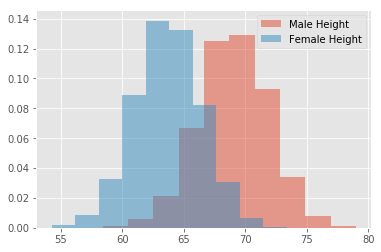

In [9]:
plt.hist(male_df.Height,bins=10, normed=True, alpha=.5, label='Male Height')
plt.hist(female_df.Height,bins=10, normed=True, alpha=.5, label='Female Height')
plt.legend()

In [10]:
# Record your observations - are these inline with your personal observations?
# This is pretty consistent with my personal observations in the real world


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

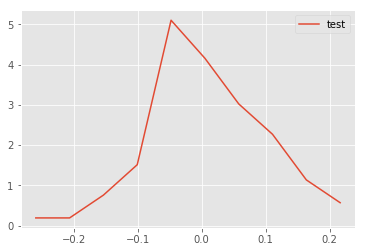

In [15]:
def density(x):
    n,bins=np.histogram(x,10,density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx,pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

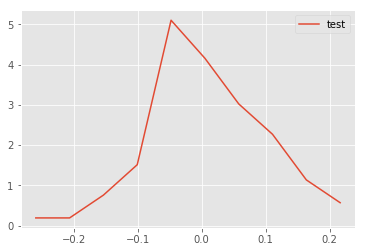

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

Text(0, 0.5, 'Frequency')

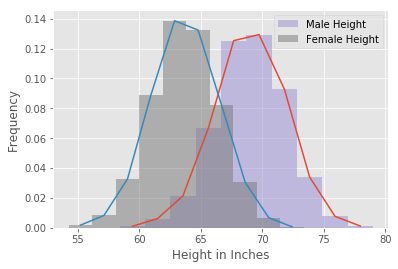

In [21]:
interp_male_x,interp_male_y=density(male_df.Height)
interp_female_x,interp_female_y=density(female_df.Height)
plt.plot(interp_male_x,interp_male_y)
plt.plot(interp_female_x,interp_female_y)
plt.hist(male_df.Height,bins=10, normed=True, alpha=.5, label='Male Height')
plt.hist(female_df.Height,bins=10, normed=True, alpha=.5, label='Female Height')
plt.legend()
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')

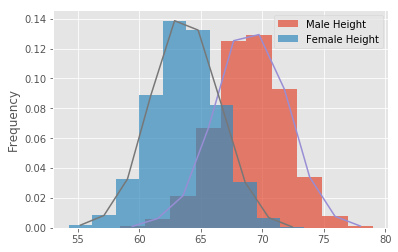

#### Repeat above exerice for male and female weights

Text(0, 0.5, 'Frequency')

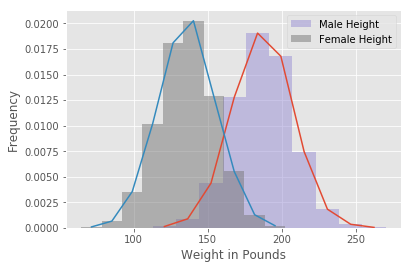

In [22]:
# Your code here 
interp_male_x,interp_male_y=density(male_df.Weight)
interp_female_x,interp_female_y=density(female_df.Weight)
plt.plot(interp_male_x,interp_male_y)
plt.plot(interp_female_x,interp_female_y)
plt.hist(male_df.Weight,bins=10, normed=True, alpha=.5, label='Male Height')
plt.hist(female_df.Weight,bins=10, normed=True, alpha=.5, label='Female Height')
plt.legend()
plt.xlabel('Weight in Pounds')
plt.ylabel('Frequency')

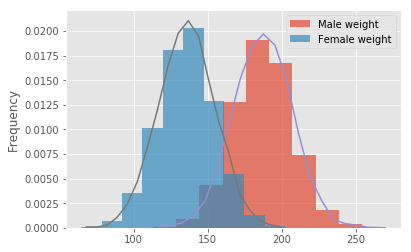

#### Write your observations in the cell below.

In [23]:
# Record your observations - are these inline with your personal observations?
# These are inline with my personal observations

# So whats the takeaway when comparing male and female heights and weights 
# Men are noticably bigger and it appears there is an aproximately equal distribution between men and women


#### Repeat Above experiments in seaborn and compare with your results. 

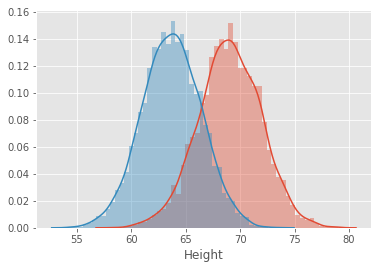

In [29]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)

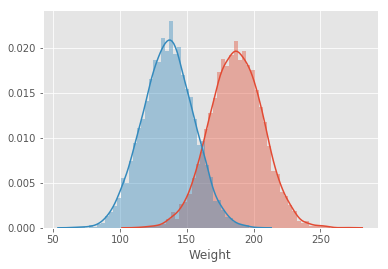

In [30]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)

In [31]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# They end up with the same result but seaborn is WAY easier

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.